In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import pandas as pd

# at top of your scripts, once:
plt.style.use('astro')


In [2]:
hdul=fits.open('swbj0243_7p6126_d2407.lc.gz')
hdul[1].header

XTENSION= 'BINTABLE'           / Binary table extension                         
BITPIX  =                    8 / Array data type                                
NAXIS   =                    2 / Number of array dimensions                     
NAXIS1  =                   68 / Number of bytes per row                        
NAXIS2  =                 2223 / Number of rows                                 
PCOUNT  =                    0 / Number of group parameters                     
GCOUNT  =                    1 / Number of groupsK count                        
TFIELDS =                   11 / Number of table fields                         
EXTNAME = 'LIGHTCURVE'         / Extension name                                 
VERSION0= '110818  '           / Version of analyze_scaled_maps_WORK            
VERSION1= '060918  '           / Version of plot_scaled_maps                    
CATNUM  =                34120 / BAT catalog number                             
TIMEDEL =              1.000

In [3]:
time=hdul[1].data['TIME']
rate=hdul[1].data['RATE']
error=hdul[1].data['ERROR']
flag=hdul[1].data['DATA_FLAG']

In [4]:
time=time[flag==0]
rate=rate[flag==0]
error=error[flag==0]

Text(0.5, 0, 'MJD')

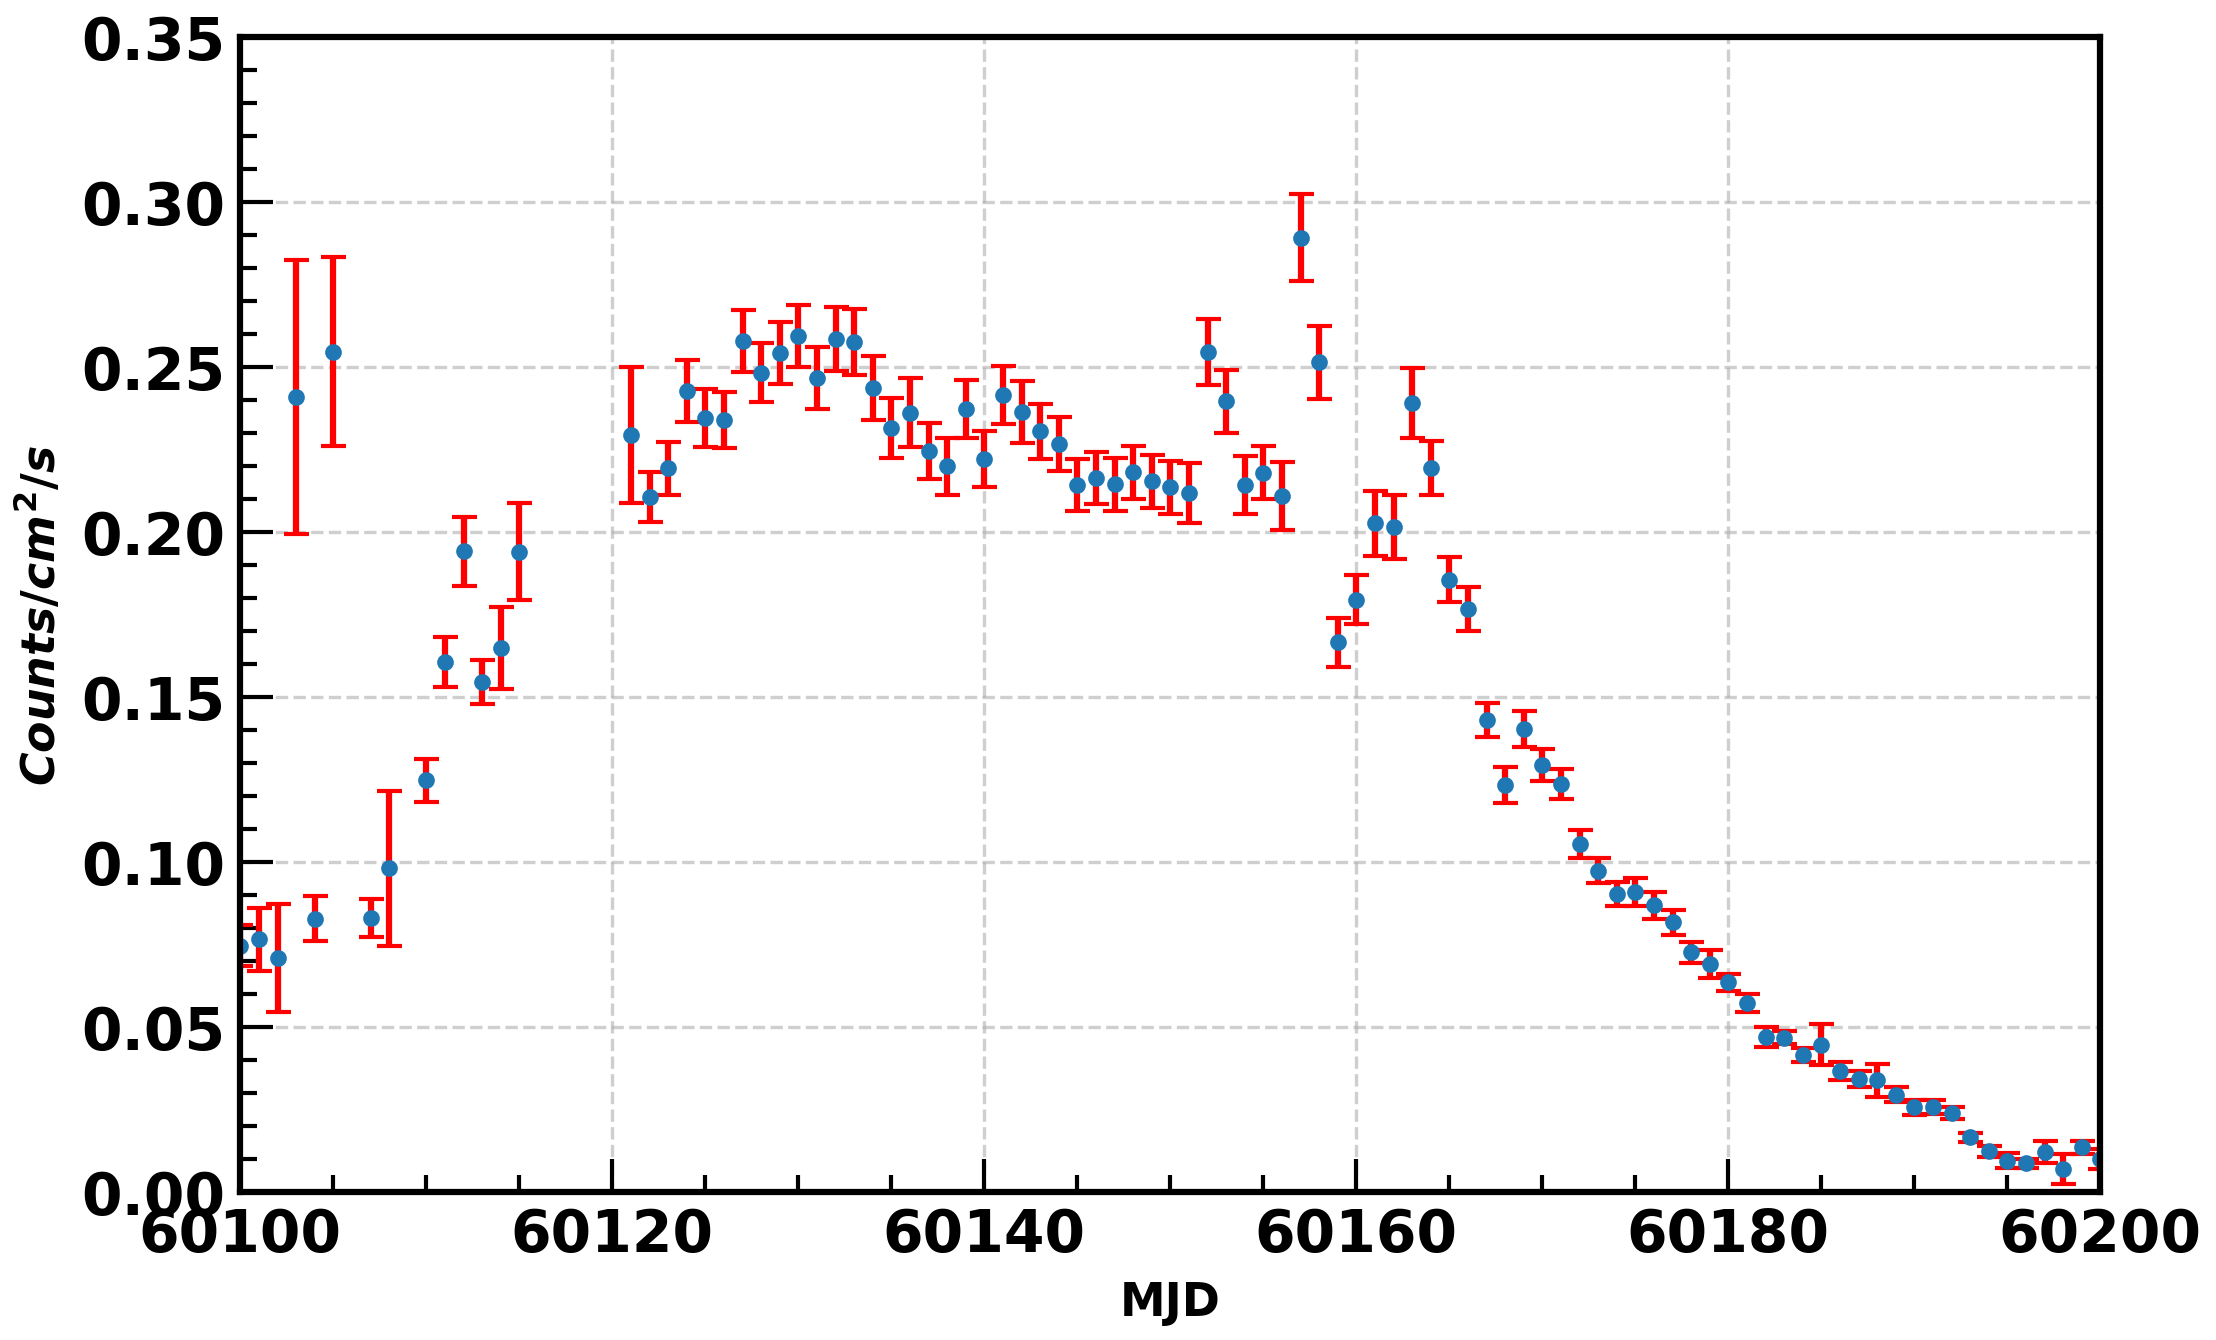

In [5]:
plt.figure(figsize=(8,5))
plt.errorbar(time, rate, yerr=error, fmt='o', ecolor='r', capsize=3, markersize=3,markeredgewidth=1)
plt.xlim(60100,60200)
plt.ylim(0,0.35)
plt.grid(alpha=0.6, linestyle="--")
plt.minorticks_on()
plt.ylabel("$Counts/cm^{2}/s$",fontsize=11)
plt.xlabel("MJD",fontsize=11)

In [6]:
df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/NICER_second_run/all_lc_periods_chisq_py_evt_files_bary_orbit.txt',sep='\t')
df_sorted = df.sort_values(by='Date')
date=df_sorted['Date']
period=df_sorted['Period']
freq=1000/period

df1=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/NICER_second_run/all_lc_periods_chisq_py_lc_files_uncorrected.txt',sep='\t')
df_sorted1 = df1.sort_values(by='Date')
date1=df_sorted1['Date']
period1=df_sorted1['Mean_Period']
stddev1=df_sorted1['Standard_Deviation']
freq1=df_sorted1['freq']
freqerr1=freq1*(stddev1/period1)

KeyError: 'Mean_Period'

NameError: name 'freqerr1' is not defined

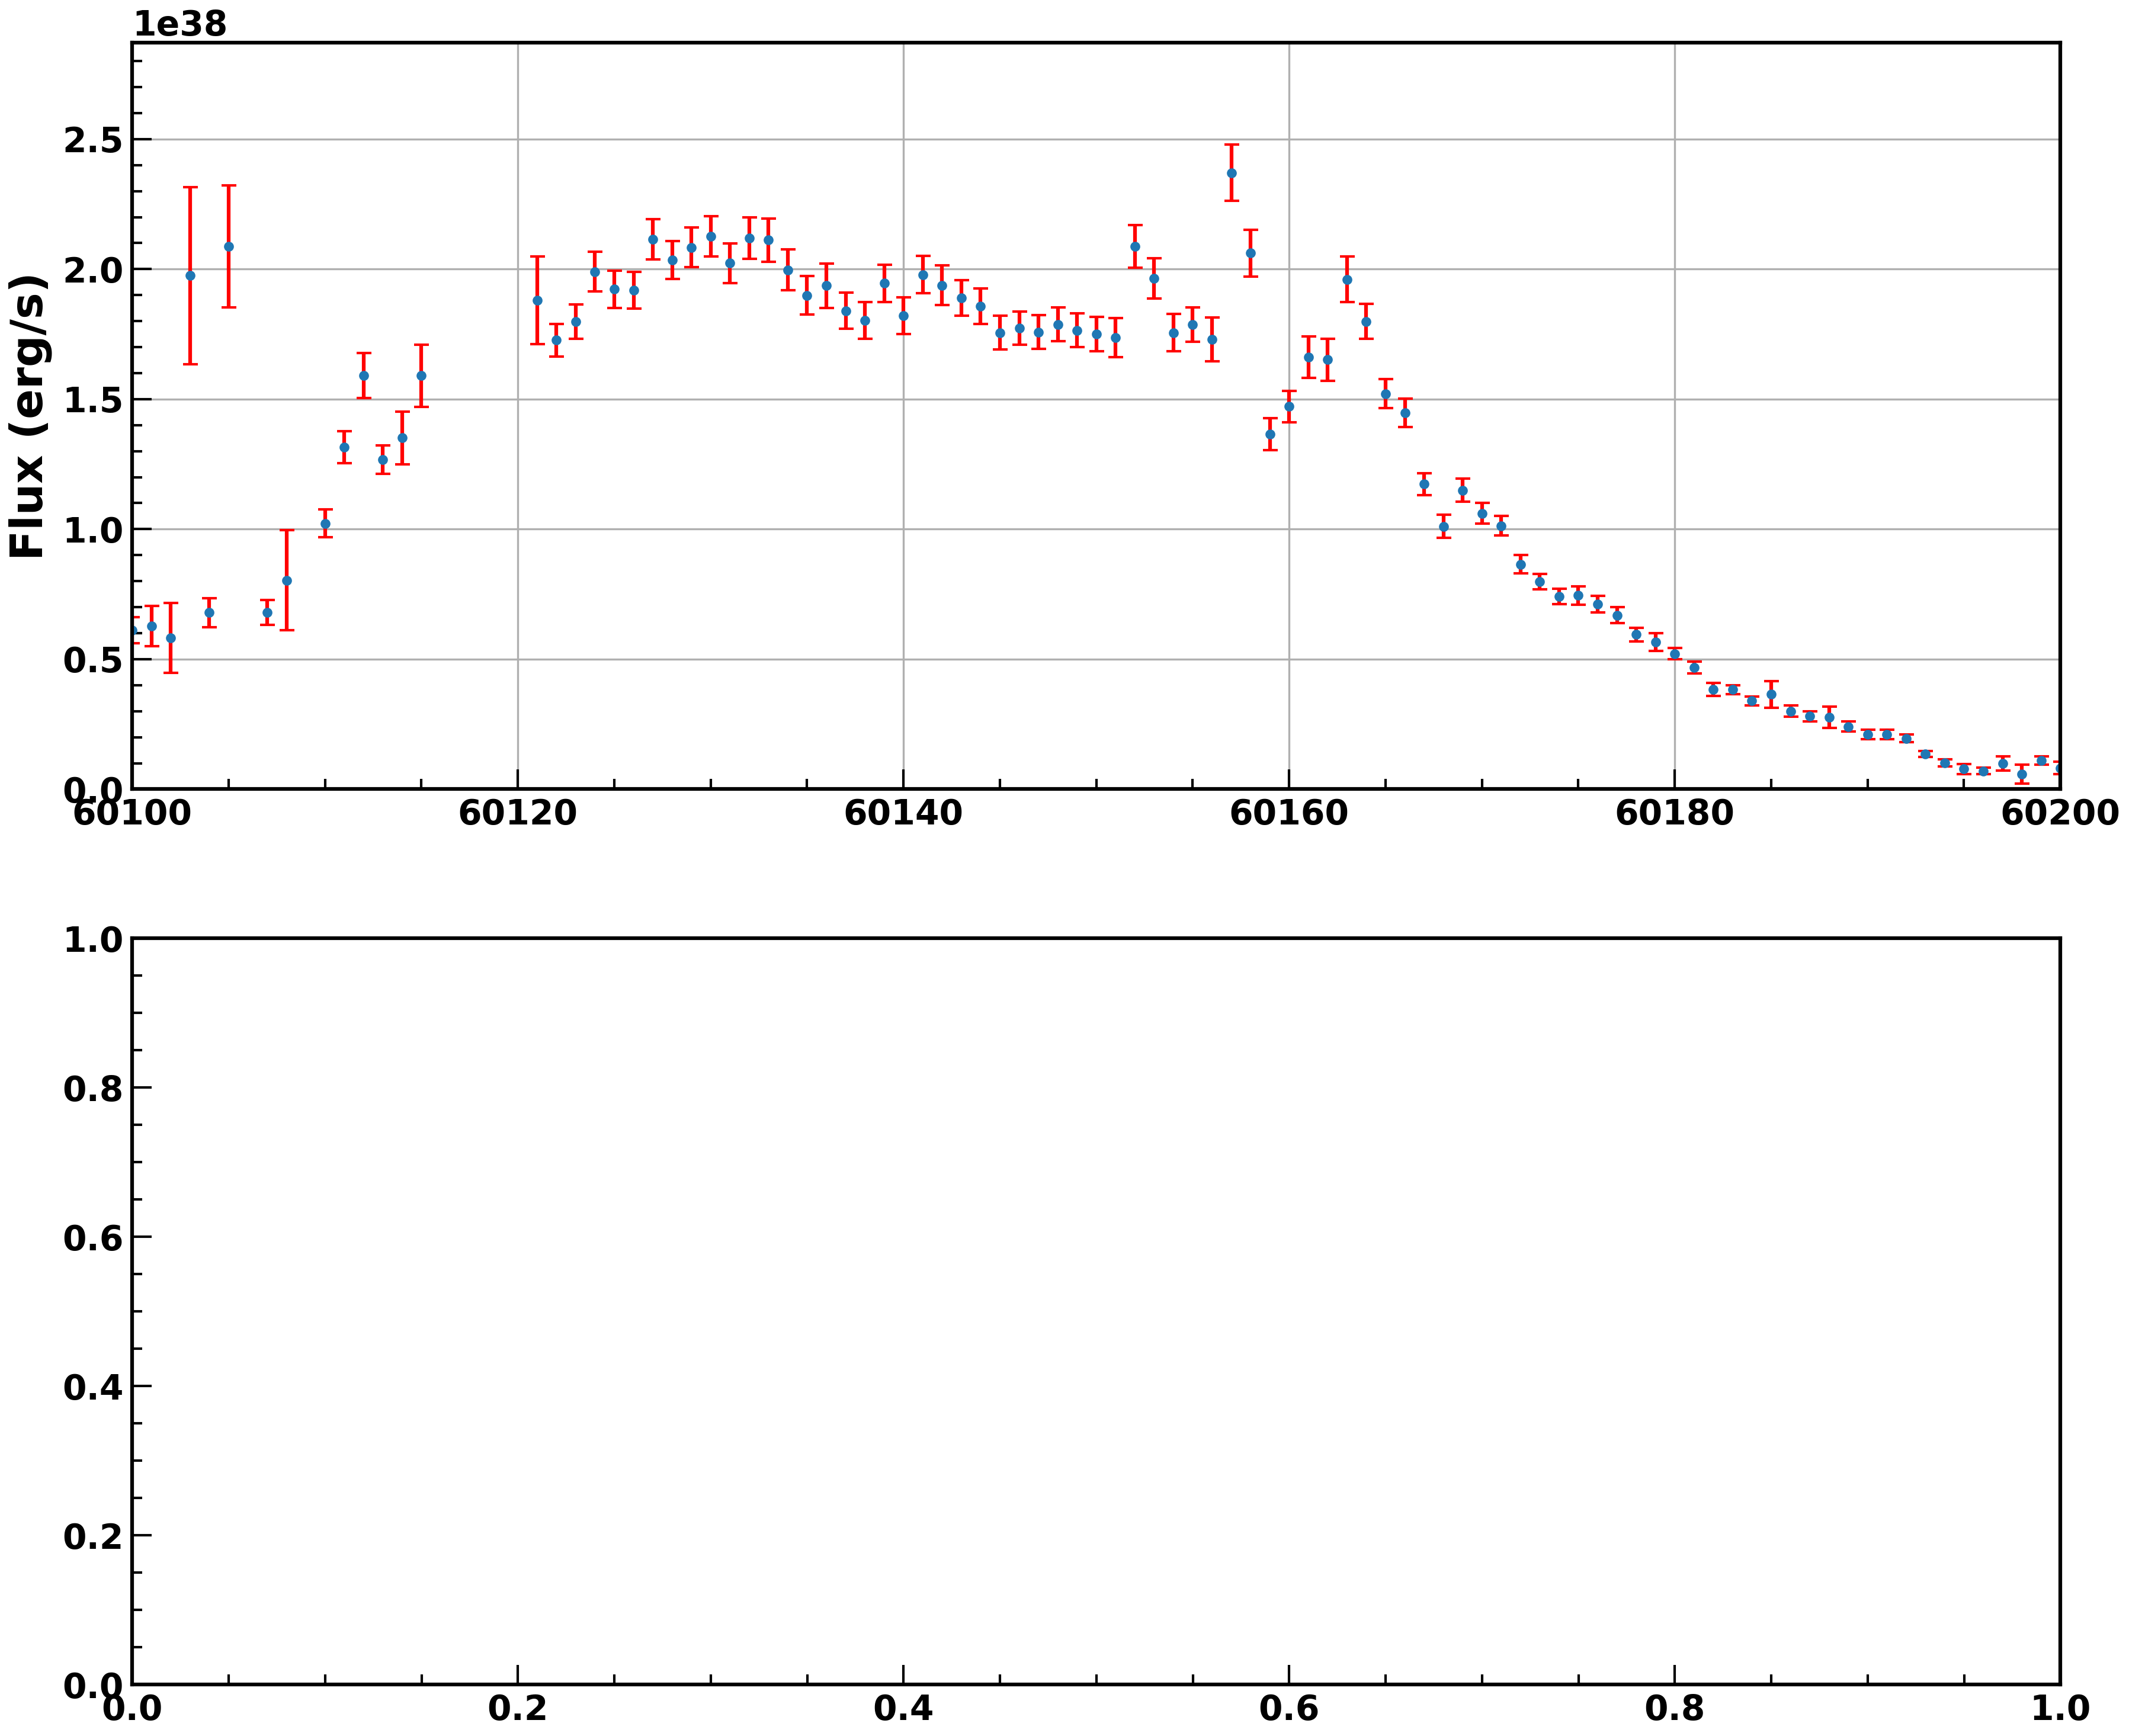

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Upper panel (Swift flux vs MJD)
ax[0].errorbar(time, rate * 8.2 * 10**38, yerr=error * 8.2 * 10**38, 
               fmt='o', ecolor='r', capsize=3, markersize=3, markeredgewidth=1)
ax[0].set_xlim(60100, 60200)
ax[0].set_ylim(0, 0.35 * 8.2 * 10**38)
ax[0].grid()
ax[0].set_ylabel(r'Flux (erg/s)', fontsize=18)  # Increase y-axis label font size
ax[0].tick_params(axis='both', labelsize=14)   # Increase tick label font size

# Lower panel (Frequency vs MJD)
ax[1].errorbar(date1 + 40000, freq, yerr=freqerr1, 
               fmt='o', ecolor='r', capsize=5, markersize=4, markeredgewidth=2.5)
ax[1].set_xlim(60100, 60200)
ax[1].set_ylim(102, 102.22)
ax[1].grid()
ax[1].set_xlabel('MJD days', fontsize=18)       # Increase x-axis label font size
ax[1].set_ylabel('Frequency (mHz)', fontsize=18)  # Increase y-axis label font size
ax[1].tick_params(axis='both', labelsize=14)   # Increase tick label font size

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Optional: Add a caption below the plot if needed
# fig.text(0.5, -0.02, 
#          "Upper panel shows SWIFT BAT count rate at relevant MJDs and Lower panel shows NICER efsearch period estimates", 
#          horizontalalignment='center', fontsize=12)

plt.show()

In [9]:

def plot_lightcurves(fits_file):
    # Initialize arrays for time, rates, and errors
    time_combined = np.array([])
    rate1_combined = np.array([])
    error_combined = np.array([])
    
    # Open the FITS file and loop over each HDU
    with fits.open(fits_file) as hdul:
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data
            
            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            
            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
    
    # Plot the light curve with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(time_combined, rate1_combined, yerr=error_combined, fmt='o', ecolor='r', capsize=3, markersize=3,markeredgewidth=1)
    plt.xlabel('Time')
    plt.ylabel('Rate')
    plt.title('Light Curve')
    plt.grid(True)



(0.0, 0.4)

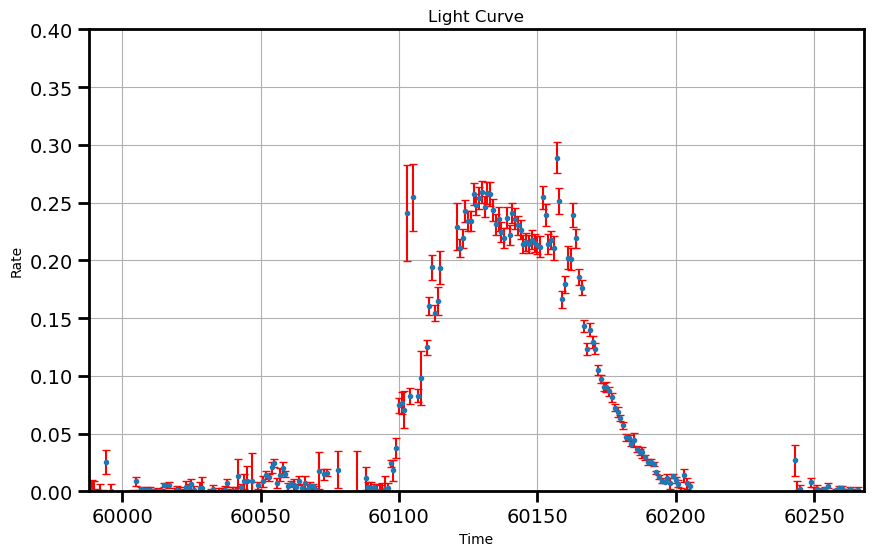

In [10]:
# Plotting Rate1 vs MJD Time
plot_lightcurves('swbj0243_7p6126_d2407.lc.gz')
plt.xlim(59988,60268)
plt.ylim(0,0.4)

In [12]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import mplcursors
from astropy.time import Time

def plot_lightcurves(fits_file,savepath):
    # Initialize arrays for time, rates, and errors
    time_combined = np.array([])
    rate1_combined = np.array([])
    error_combined = np.array([])
    flag_combined= np.array([])
    with fits.open(fits_file) as hdul:
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data

            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            flag= data['DATA_FLAG']

            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
            flag_combined= np.concatenate([flag_combined, flag])

        time_combined = time_combined[flag_combined<1]
        rate1_combined = rate1_combined[flag_combined<1]
        error_combined = error_combined[flag_combined<1]
        
        # Convert UTC start times to MJD
        utc_start_times_markers = [
            "2023-06-17T10:28:32", 
            "2023-07-05T05:41:40", 
            "2023-08-18T01:42:52", 
            "2023-09-16T06:00:40"
        ]

        utc_start_times = [
            "2023-04-10T15:03:28",
            "2023-06-02T10:28:32", 
            "2023-09-16T06:00:40"
        ]

        # Convert UTC strings to MJD
        utc_start_times = Time(utc_start_times, format='isot')
        mjd_start_times = utc_start_times.mjd

        utc_start_times_markers = Time(utc_start_times_markers, format='isot')
        mjd_start_times_markers = utc_start_times_markers.mjd

        # Plot the light curve with error bars
        plt.figure(figsize=(10, 6))
        plt.errorbar(time_combined, rate1_combined, yerr=error_combined, fmt='o', ecolor='r', capsize=3, 
                 label='Rate with Error', markersize=4, markeredgewidth=0.5)

        plt.axvspan(mjd_start_times[1],mjd_start_times[1]+104,alpha=0.2,color='g',label='mid-outburst')

        plt.xlabel('Time (MJD)', fontsize=16)
        plt.ylabel("$Counts/cm^{2}/s$", fontsize=16)
        plt.grid(alpha=0.6, linestyle="--")
        plt.minorticks_on()
        plt.xlim(60000,60300)
        plt.ylim(-0.01,0.35)

        # Make ticks thicker and labels larger
        plt.tick_params(axis='both', which='major', width=2, length=8, labelsize=14)
        plt.tick_params(axis='both', which='minor', width=1, length=4)  # thinner minor ticks
        for spine in plt.gca().spines.values():
            spine.set_linewidth(1)
        plt.savefig(savepath)
        plt.show()


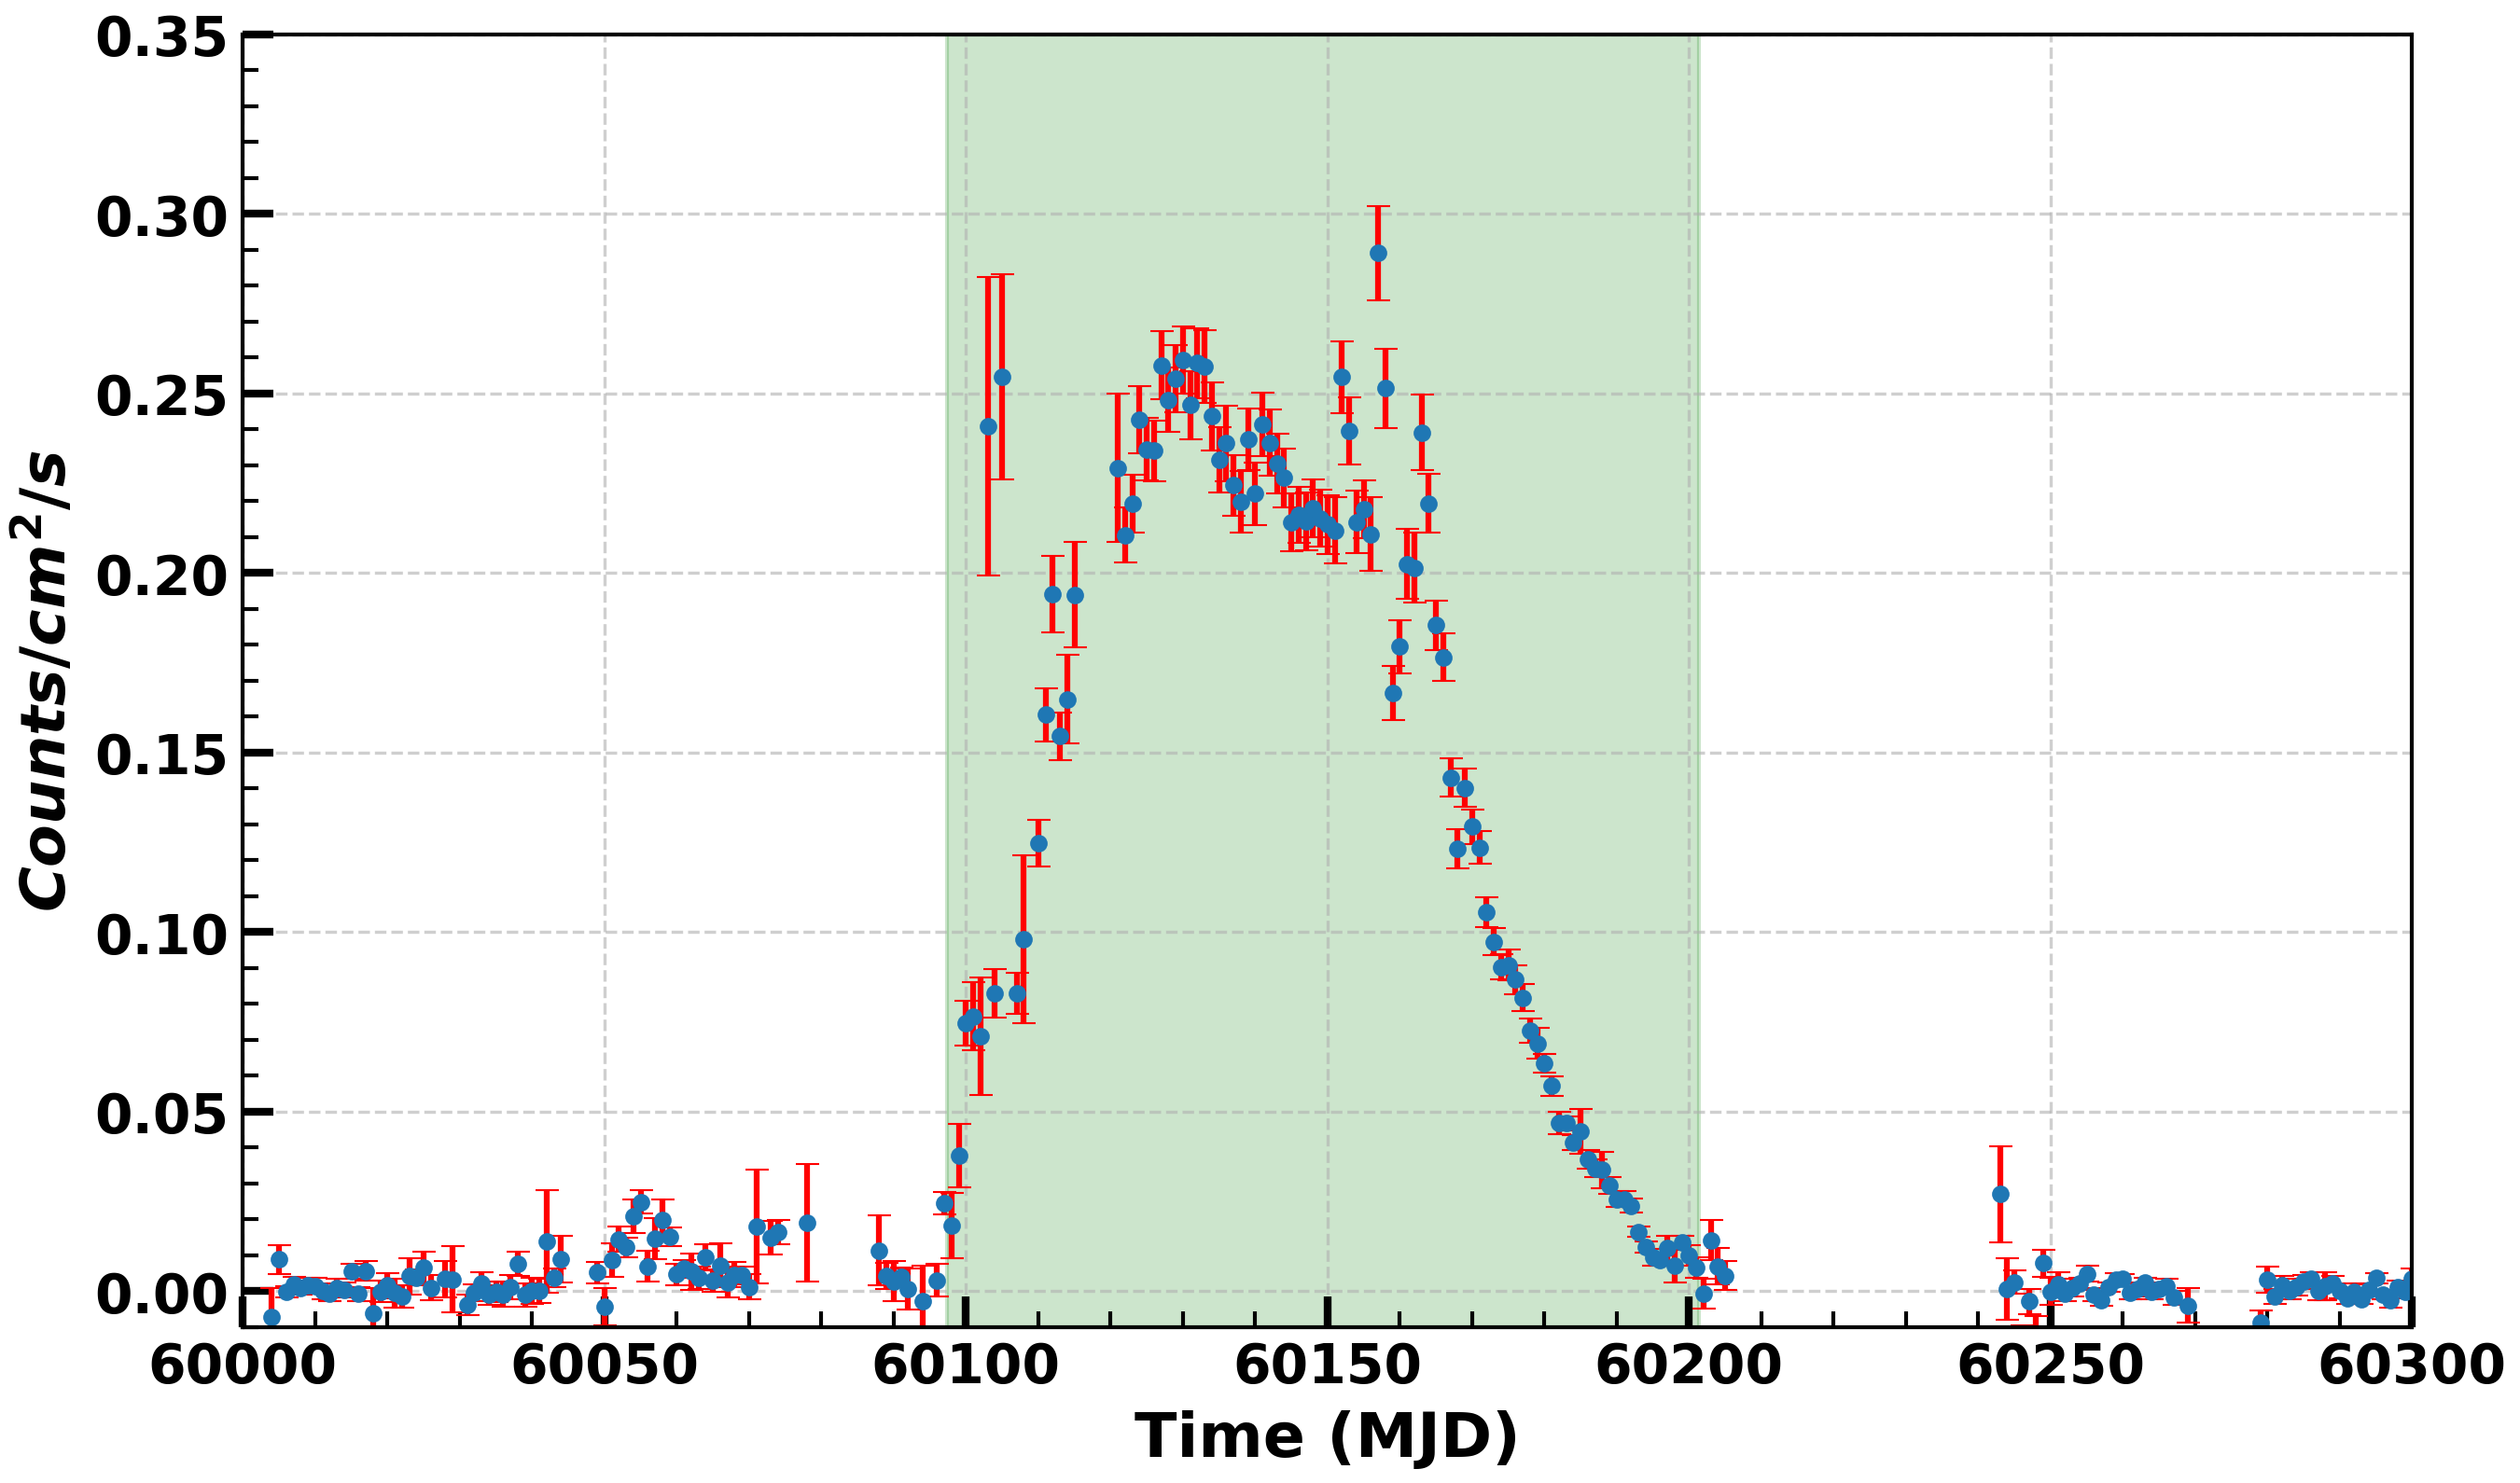

In [14]:
# Plotting Rate1 vs MJD Time
savepath='/home/supremekai/thesis/J0243_6p6124/swift_bat.png'
plot_lightcurves('swbj0243_7p6126_d2407.lc.gz',savepath)

In [13]:
with fits.open('swbj0243_7p6126_d2407.lc.gz') as hdul:
        # Initialize arrays for time, rates, and errors
        time_combined = np.array([])
        rate1_combined = np.array([])
        error_combined = np.array([])
        flag_combined= np.array([])
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data
            
            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            flag= data['DATA_FLAG']
            
            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
            flag_combined= np.concatenate([flag_combined, flag])

In [14]:
np.unique(flag_combined)

array([0., 2., 3.])

In [15]:
print(rate1_combined[time_combined==60044],rate1_combined[time_combined==60047],
rate1_combined[time_combined==60112],
rate1_combined[time_combined==60130],
rate1_combined[time_combined==60174],
rate1_combined[time_combined==60203])

[0.0089357] [0.00922004] [0.19404365] [0.2593448] [0.09031704] [0.01413414]
